# Phase 3 Data Analysis

This file is an extension of the Phase 2 Data Cleaning. In this file, we combine what we have from Phase 2 and our hypothesis in order to draw some prediction/conlusion based on the dataset and our observation. Please scroll down to "Official Phase 3 starts here" below.

***

# business

#### - First lets convert the business jason file into a dataframe so we can start the cleaning process

In [1]:
import pandas as pd
import json
business = [json.loads(line) for line in open('yelp_academic_dataset_business.json', 'r')]     # create a dictionary to read in the json objects of the tip file

In [2]:
business_df = pd.json_normalize (business)

#### - After converting the json file to a dataframe and print the first 5 entries, we can see that there are columns that we wont need for our purpose. We also encountered another problem, the business file has all type of business and we are only interested in restaurants. One column that will help us is the "categories" column, lets print the first 20 items in our data to check the results.

#### - What we can see is that "categories" encloses key words describing each business. Since there is no more information that we can use to find if a business is a restaurant, we will find if "food" or "restaurant" is in the "categories" column and filter the results

In [3]:
all_restaurants_df = business_df[business_df['categories'].str.contains("food") | business_df['categories'].str.contains("Food") | business_df['categories'].str.contains('Restaurant') | business_df['categories'].str.contains('restaurant')] 

### Now, after the filter we ended with a database of 80,505 restaurants. One other thing that we need to do is to delete the columns that we wont use, like the attributes. What we can do is to redo the dataframe again, but this time without copying all the attribute columns

In [4]:
all_restaurants_df =  all_restaurants_df[['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'stars','review_count','is_open','categories','hours']]
all_restaurants_df.set_index('name', inplace= True)
all_restaurants_df.reset_index(inplace=True)

#### We also need to filter the dataset by countries, since the file contains business from USA and Canada. 

In [5]:
all_restaurants_df.state.describe()  #to know how many different states do we have in the data

count     80505
unique       29
top          ON
freq      20093
Name: state, dtype: object

#### Our data has these estates by country:
#### USA: AZ, NV, OH, NC, PA, WI, IL, SC, NY, TX, CO
#### Canada: ON, QC, AB, BC
#### England: XWY, HPL
#### Now we proceed to create two new datasets separated by country for our purposes.

In [6]:
#Filter the data by canadian restaurants only
canada_restaurants_df=all_restaurants_df[all_restaurants_df['state'].str.contains("ON") | all_restaurants_df['state'].str.contains("QC") | all_restaurants_df['state'].str.contains("AB") | all_restaurants_df['state'].str.contains('BC')]
canada_restaurants_df.reset_index(inplace=True)

In [7]:
#Filter the data by canadian restaurants only
usa_restaurants_df=all_restaurants_df[all_restaurants_df['state'].str.contains("AZ") | all_restaurants_df['state'].str.contains("CO") | all_restaurants_df['state'].str.contains("TX") | all_restaurants_df['state'].str.contains("NY") | all_restaurants_df['state'].str.contains("SC") | all_restaurants_df['state'].str.contains("IL") | all_restaurants_df['state'].str.contains("WI") | all_restaurants_df['state'].str.contains("PA") | all_restaurants_df['state'].str.contains("NV") | all_restaurants_df['state'].str.contains("OH") | all_restaurants_df['state'].str.contains('NC')]
usa_restaurants_df.reset_index(inplace=True)

## RATES BY STATE

#### Now, we need to create two tables to show how the ratings are distributed in each state by country, and graph these. 

      name                                              
stars  1.0  1.5   2.0   2.5   3.0   3.5   4.0   4.5  5.0
state                                                   
AB      34   85   225   372   743   992   957   553  128
BC       0    2     0     0     0     0     0     0    0
ON     147  403  1127  2189  3968  5057  4619  2107  476
QC      36  105   247   483  1055  1512  2096  1429  372


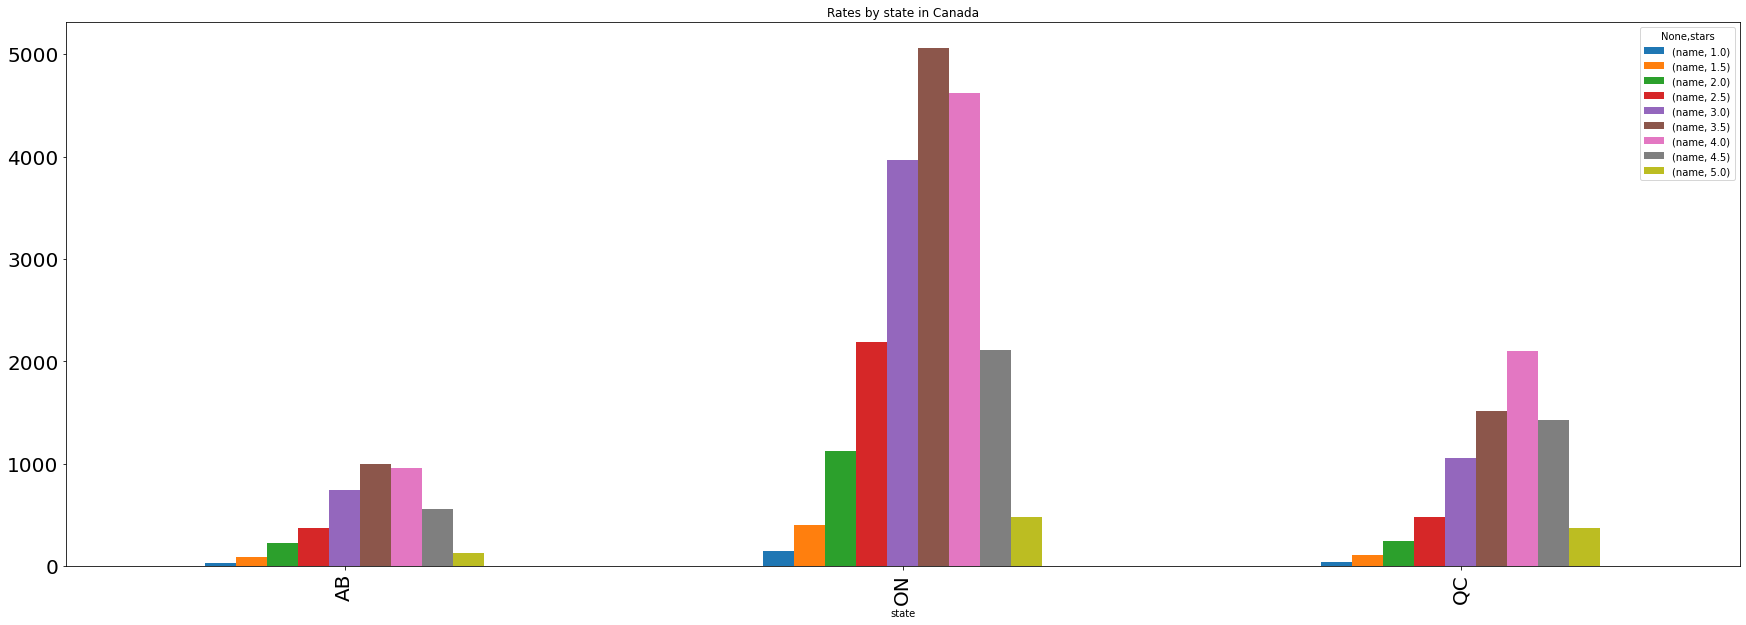

In [8]:
ratevsstateCA=pd.pivot_table(canada_restaurants_df,index=["state"],columns="stars",values=["name"], aggfunc="count",fill_value=0)
print(ratevsstateCA)
ratevsstateCA.loc[['AB','ON','QC']].plot.bar(title="Rates by state in Canada", fontsize='20', figsize=(30,10))

stars  1.0  1.5   2.0   2.5   3.0   3.5   4.0   4.5  5.0
state                                                   
AZ     119  435  1086  1616  2644  3284  3663  2158  707
CO       0    0     1     1     0     0     0     0    0
IL       3   25    79    81   169   197   167   100   24
NC      49  200   387   625   973  1310  1410   853  218
NV      68  244   706  1119  1738  2274  2585  1643  465
NY       1    0     1     2     2     0     2     4    1
OH      93  219   459   778  1147  1582  1742  1001  283
PA      32  119   270   501   902  1195  1267   890  244
SC       4   20    44    59   105   110   115    71   24
TX       0    1     1     0     0     1     1     0    0
WI      18   47   113   231   355   517   554   328   87


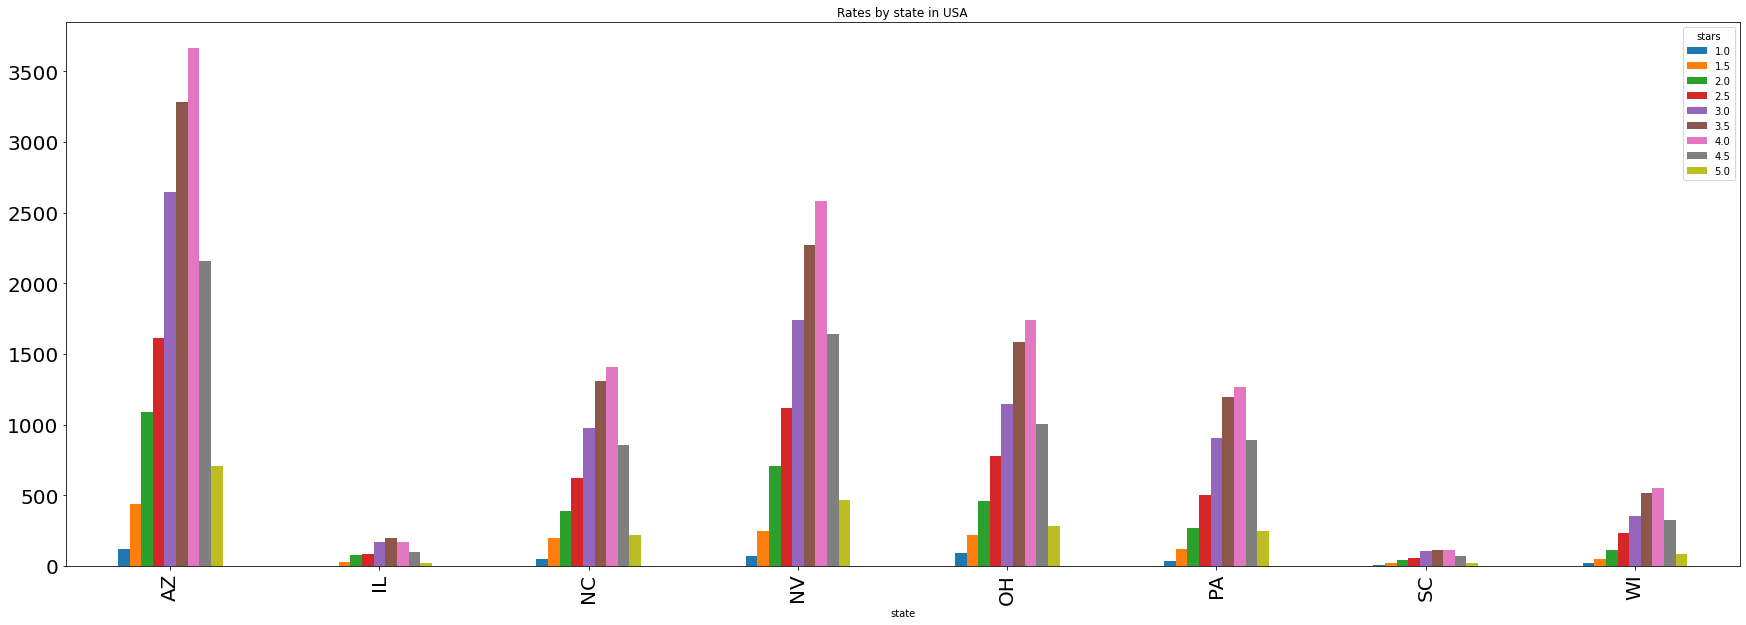

In [9]:
ratevsstateUSA=pd.pivot_table(usa_restaurants_df,index=["state"],columns="stars",values="name", aggfunc="count", fill_value=0 )
print (ratevsstateUSA)
ratevsstateUSA.loc[['AZ','IL', 'NC', 'NV','OH','PA','SC','WI']].plot.bar(title="Rates by state in USA", fontsize='20', figsize=(30,10))

### After checking both graphs, we can come up with some observations, like we can see that the most used rating in USA is 4.0 in every state, while in Canada is 3.5. Do this mean that the people in Canada is a little bit more critique? Or that the restaurants in USA provide better service? We will need to make a deeper analysis in phase 3 of the project to prove or disapprove these points.  

## Hamburguer vs Poutine

#### One other thing that we want to analyze is the relation between USA and restaurants that sell hamburguers and Canada with Putine. Since these are the traditional foods for each country, we want to check if these are some of the most popular restaurants based in the number of restaurants and the ratings. 

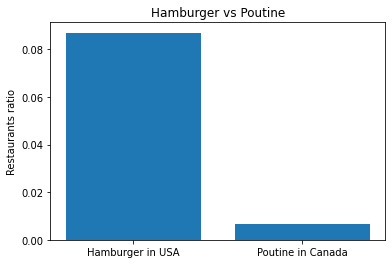

In [10]:
import re
import matplotlib.pyplot as plt
burgersUSA= usa_restaurants_df["categories"].str.count("burger", re.I).sum()
burgersUSA= burgersUSA/len(usa_restaurants_df)  #divide by the total number of restaurants in 
#print (burgersUSA)
poutineCA= canada_restaurants_df["categories"].str.count("poutine", re.I).sum()
poutineCA=poutineCA/len(canada_restaurants_df) #divide by the total number of restaurants in canada
#print (poutineCA)
newgraph = [burgersUSA, poutineCA]
plt.bar(["Hamburger in USA", "Poutine in Canada"], newgraph)
plt.title('Hamburger vs Poutine')
plt.ylabel('Restaurants ratio')
plt.show()

#### What we can see from this graph is that the ratio of restaurants that sells burgers in USA is way bigger that the ratio of restaurants that sell poutine in Canada. Since its not common to find restaurants that sell poutine in USA, we can check only how is te ratio in Canada between Hamburgers and Poutin. 

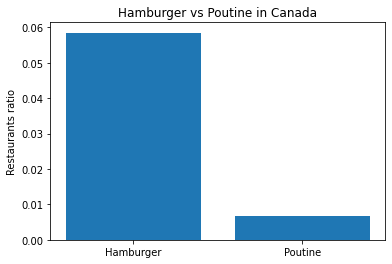

In [11]:
burgersCA= canada_restaurants_df["categories"].str.count("burger", re.I).sum()
burgersCA= burgersCA/len(canada_restaurants_df)  #divide by the total number of restaurants in 
newgraph = [burgersCA, poutineCA]
plt.bar(["Hamburger", "Poutine"], newgraph)
plt.title('Hamburger vs Poutine in Canada')
plt.ylabel('Restaurants ratio')
plt.show()

#### What we can see in this last graph is that even in Canada hamburgers are more frequent in restaurants than the traditional food "poutine". The total ratio for hamburgers in Canada is just slightly different from the ratio in USA, therefore apparently hamburgers are found in Canada in a similar proportion than in the USA. 

***

## Offfical Phase 3 starts from here

From Phase 1, we came up with these questions:
    
    1. Are there any relations between the most rated restaurants in the USA and Canada. 
    2. Same as above but this time with the worst rated restaurants.
    3. Does locations have an effect on the density of the restaurants 
    4. Can we extrapolate living expenses based on the difference in prices of the same type of restaurants in different regions.
    5. Draw a map with the cities where restaurants have more and less reviews.

In this phase 3, we try to answer all of these questions using the cleaned up data frames from phase 2 and multiple analyzing techniques we have learned throughout the quarter. 

__Question 1:__ Are there any relations between the most rated restaurants in the USA and Canada.
> For this question, we use the 2 data frames 'usa restaurants' and 'canada restaurants'. We seperate each data frames in a way that we only keep the high rating (>= 4.0) restaurants in each data frame. In addition, we also take into account the number of review counts. A 5-star restaurants with only 10 reviews does not tell us anything compare to a 4-star with 200 reviews. As the result, we only keep the restaurants with high review AND high rating.

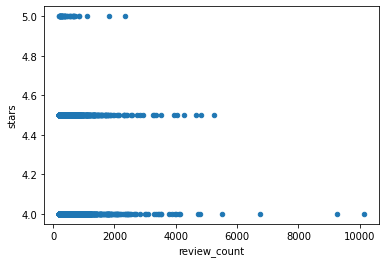

In [31]:
usa_high = usa_restaurants_df[usa_restaurants_df['stars'] >= 4]
usa_Q1 = usa_high[usa_high['review_count'] >= 200]
usa_Q1.plot(kind='scatter',x='review_count',y='stars')

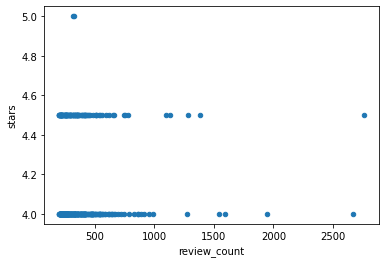

In [26]:
canada_high = canada_restaurants_df[canada_restaurants_df['stars'] >= 4]
canada_Q1 = canada_high[canada_high['review_count'] >= 200]
canada_Q1.plot(kind='scatter',x='review_count',y='stars')

In [27]:
usa_Q1['stars'].value_counts()

4.0    2177
4.5    1135
5.0      45
Name: stars, dtype: int64

In [28]:
canada_Q1['stars'].value_counts()

4.0    274
4.5    100
5.0      2
Name: stars, dtype: int64

In [29]:
usa_Q1.groupby(['state']).sum().drop(columns=(['is_open','hours','index','stars']))

,review_count
state,
AZ,628580
IL,5735
NC,102797
NV,904466
OH,52854
PA,62251
SC,3458
TX,987
WI,28175


In [30]:
canada_Q1.groupby(['state']).sum().drop(columns=(['is_open','hours','index','stars']))

,review_count
state,
AB,3944
ON,98354
QC,41099


__Observation:__ 
>Looking at the graphs, it doesn't seem like we can get much information out of them to see if the restaurants in USA and Canada have anything in common. We can see that there is one particular restaurant in Canada that has a really high review and high rating. However, that is just one of the many restaurants so the different it makes is minimal thus we can safely ignore it. Overall, the ratio of the 5-stars to 4-star rating in both countries is similar to each other as the graphs are closely resemble each other. Consequently, we need find another way to draw more information from the data. Thus we did some more comparison using the numbers.

>From the numbers, we can see that the states in USA (Arizona, Nevada, and North Carolia) and the regions in Canada (Ontario and Quebec) all have a very high review counts. With a quick google image search. All of these states and regions have a common feature. __They are close to the coasts.__                      

__Conclusion:__ 
>Unfortunately, we were not able to get much information from the graphs as we hoped. However, by using the numbers, we see that all of these restaurants have a same feature that they are close to the coasts. This observation does make sense as the states and regions that are close to the coasts usually have a higher population, thus estalishing restaurants there is a good choice. So we found out that most of the high rating restaurants in USA and Canada are concentrated in the regions near the coasts.
***

__Question 2:__ Are there any relations between the worst rated restaurants in the USA and Canada.
> For this question, we have a same approach with question 1 but with worst rating ( < 2.0) AND high rating

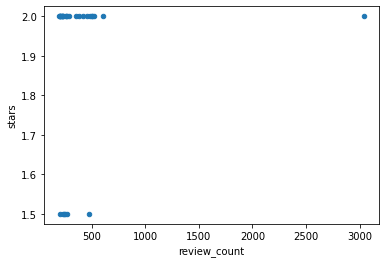

In [18]:
usa_low = usa_restaurants_df[usa_restaurants_df['stars'] <= 2]
usa_Q2 = usa_low[usa_low['review_count'] >= 200]
usa_Q2.plot(kind='scatter',x='review_count',y='stars')

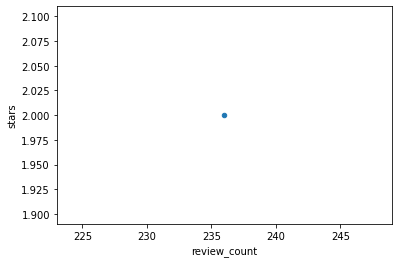

In [36]:
canada_low = canada_restaurants_df[canada_restaurants_df['stars'] <= 2]
canada_Q2 = canada_low[canada_low['review_count'] >= 200]
canada_Q2.plot(kind='scatter',x='review_count',y='stars')

In [40]:
canada_Q2.drop(columns=(['business_id','categories','hours']))

,index,name,address,city,state,postal_code,stars,review_count,is_open
12306,31607,Toula,1 Harbour Square,Toronto,ON,M5J 1A6,2.0,236,1


In [20]:
usa_Q2['stars'].value_counts()

2.0    24
1.5     6
Name: stars, dtype: int64

In [21]:
canada_Q2['stars'].value_counts()

2.0    1
Name: stars, dtype: int64

In [41]:
usa_Q2.groupby(['state']).sum().drop(columns=(['is_open','hours','index', 'stars']))

,review_count
state,
AZ,1800
NC,1444
NV,8760
PA,224


In [33]:
canada_Q2.groupby(['state','stars']).sum().drop(columns=(['is_open','hours','index']))

,,review_count
state,stars,
ON,2.0,236


__Observation:__ 
>OK, we have a suprising situation here by looking at the graphs. The graph of Canada worst rating restaurant only seems like it only has 1 entry. To verify that, we printed out the data frame and it was indeed only 1 entry. They say Canadians are the politest people. This is so true here based on the graph. Unfortunately for us, we again cannot draw out any information from the graph since there is simply not enough data to compare with.     

>Since we can not compare these worst rating restaurants with each other, we switch the comparison of these low rating restaurants to the high rating restaurants from question 1 above. Looking at the numbers, we see that the review counts for low restaurants are significantly lower compared to the high rating restaurants.

__Conclusion:__ 
>We do not have much to conclude for this question. The only thing we can say is that the restaurants in USA and Canada all have a lower review counts compared to the high rating restaurants. From that information, we can also say that most of the restaurants in North America serve good food.

__Question 3:__ Does locations have an effect on the density of the restaurants 

## Restaurant density by state

AZ    15712
NV    10842
OH     7304
NC     6025
PA     5420
WI     2250
IL      845
SC      552
NY       13
TX        4
CO        2
Name: state, dtype: int64


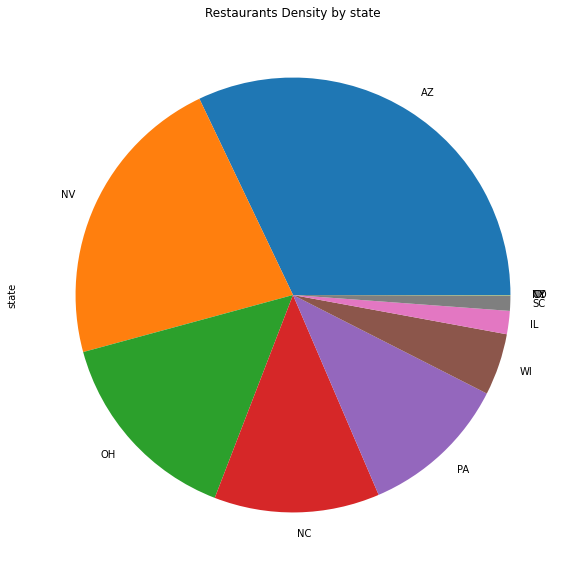

In [24]:
usa_restaurants_df.state.value_counts().plot.pie(figsize=(20, 15), title = "Restaurants Density by state in USA", fontsize=20, autopct='%.2f')

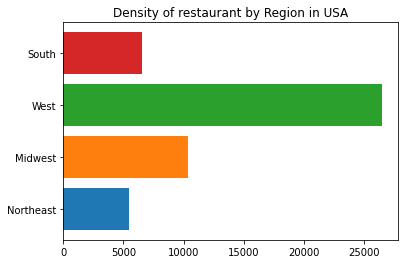

In [42]:
#Northeast: PA, NY
#Midwest: OH, WI, IL, 
#West: AZ, NV, VO
#South: NC, SC, TX

northeast=all_restaurants_df[all_restaurants_df["state"].str.contains("PA", re.I) | all_restaurants_df["state"].str.contains("NY", re.I)]
midwest=all_restaurants_df[all_restaurants_df["state"].str.contains("OH", re.I) | all_restaurants_df["state"].str.contains("WI", re.I) | all_restaurants_df["state"].str.contains("IL", re.I)]
west=all_restaurants_df[all_restaurants_df["state"].str.contains("AZ", re.I) | all_restaurants_df["state"].str.contains("NV", re.I) | all_restaurants_df["state"].str.contains("VO", re.I)]
south=all_restaurants_df[all_restaurants_df["state"].str.contains("NC", re.I) | all_restaurants_df["state"].str.contains("SC", re.I) | all_restaurants_df["state"].str.contains("TX", re.I)]
newgraph= [len(northeast),len(midwest),len(west),len(south)]
plt.barh(["Northeast", "Midwest","West","South"], newgraph,color=['C0', 'C1', 'C2','C3'])
plt.title('Density of restaurant by Region in USA')
plt.show()

__Question 4:__ Can we extrapolate living expenses based on the difference in prices of the same type of restaurants in different regions.

space to answer question 4 here

space to answer question 4 here

__Question 5__ Draw a map with the cities where restaurants have more and less reviews.

space to answer question 5 here

space to answer question 5 here